In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, average_precision_score,roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Exploratory Data Analysis and Visualization

In [7]:
#Let's look at the description of dataset

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Checking if there are any missing values

df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
# As we can see above there is no NULL value in the dataset.

In [11]:
# Let's see if there is any duplicated rows

duplicated_rows = df.duplicated()
df[duplicated_rows].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1


In [12]:
# We can avoid duplicated rows by removing them from dataset.

df.drop_duplicates(inplace = True)

In [13]:
df.shape

(302, 14)

### Let's look at the distribution of features

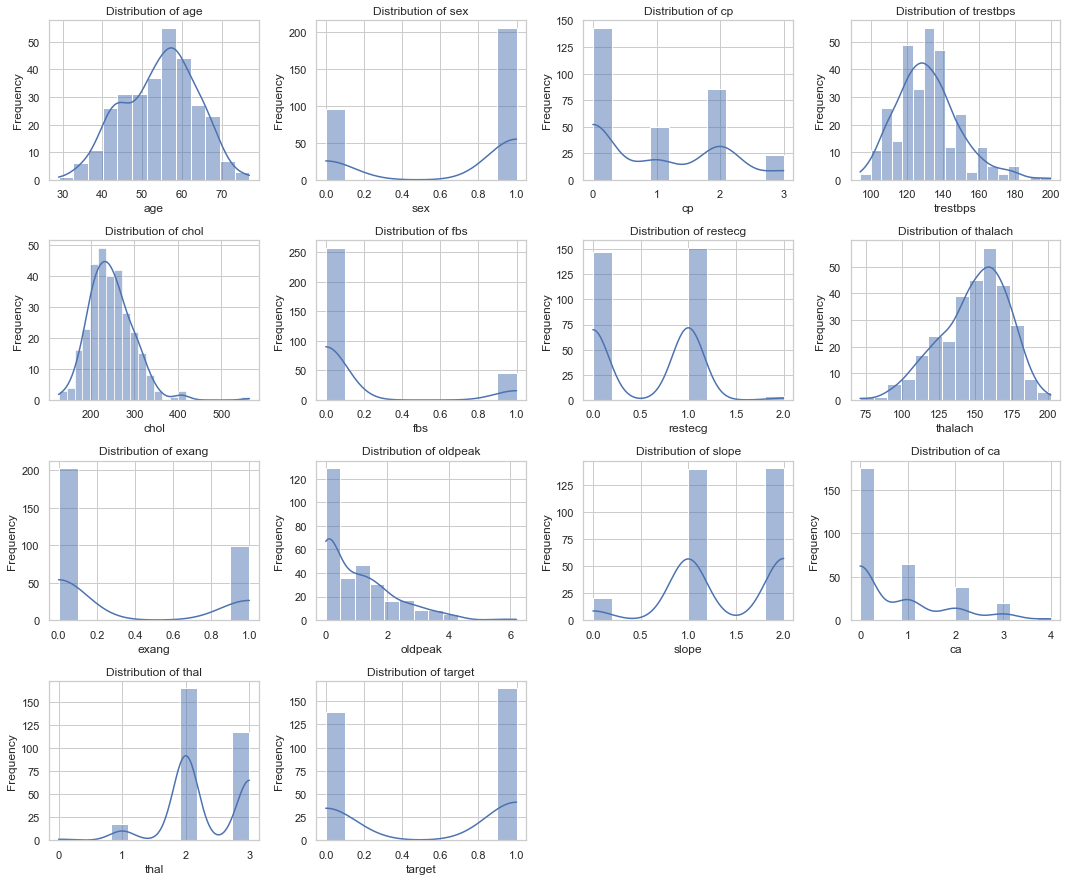

In [14]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Flattening the axes
axes = axes.flatten()

# Plotting distribution graphs
for i, feature in enumerate(df.columns):
    if i < len(axes):
        sns.histplot(df[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout for better look
plt.tight_layout()
plt.show()

In [15]:
# As it appears, some features are not normally distributed, but we will solve this problem later.

### Relationship between features and target

In [16]:
# Let's take a look at the relationship of some features with target.

In [17]:
num_cols = df.select_dtypes(include=['number'])
features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

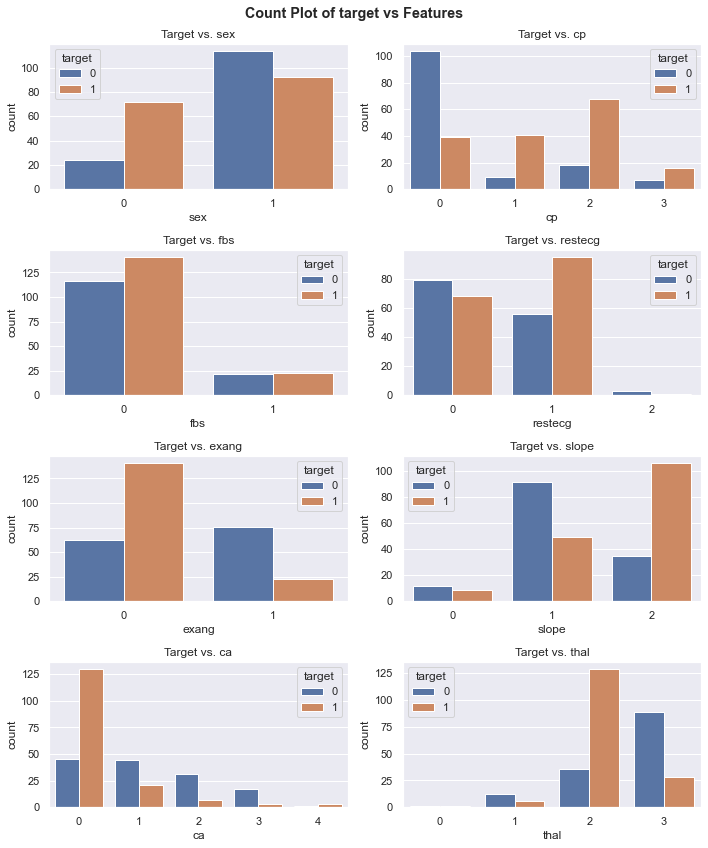

In [18]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,12))
axes = axes.flatten()

for i, cat in enumerate(features):
    sns.countplot(x=cat, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f"Target vs. {cat}")
    
plt.suptitle("Count Plot of target vs Features", fontweight='bold')
plt.tight_layout()
plt.show()

### Visualization

Text(0, 0.5, 'Count')

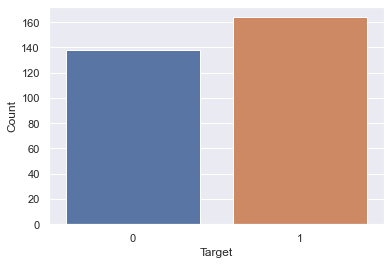

In [20]:
sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

In [21]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [22]:
# According to the graph, we can consider dataset as balanced.

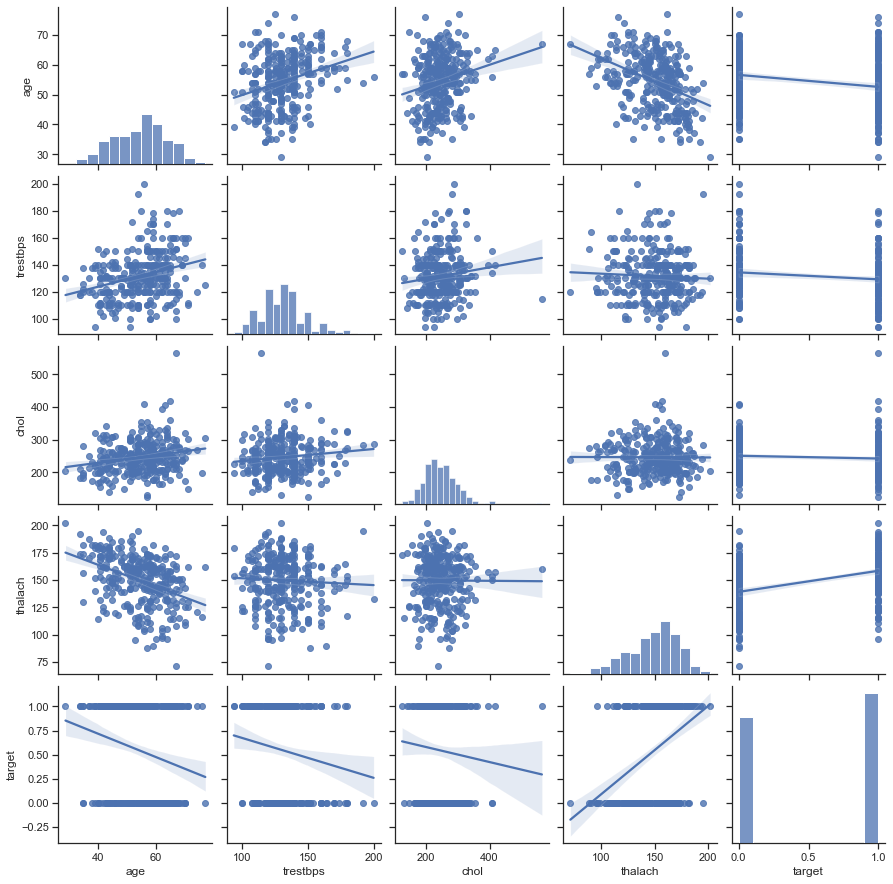

In [24]:
sns.set(style="ticks")

# Creating a pairplot
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],kind = 'reg')
plt.show()

In [25]:
# By plotting regresson lines in the jointplots (non-diagonal graphs),
# we can have intuition about positive and negative correlation. Beyond that we can also see that some features
# contain outliers. However, let's take a close look by using boxplot

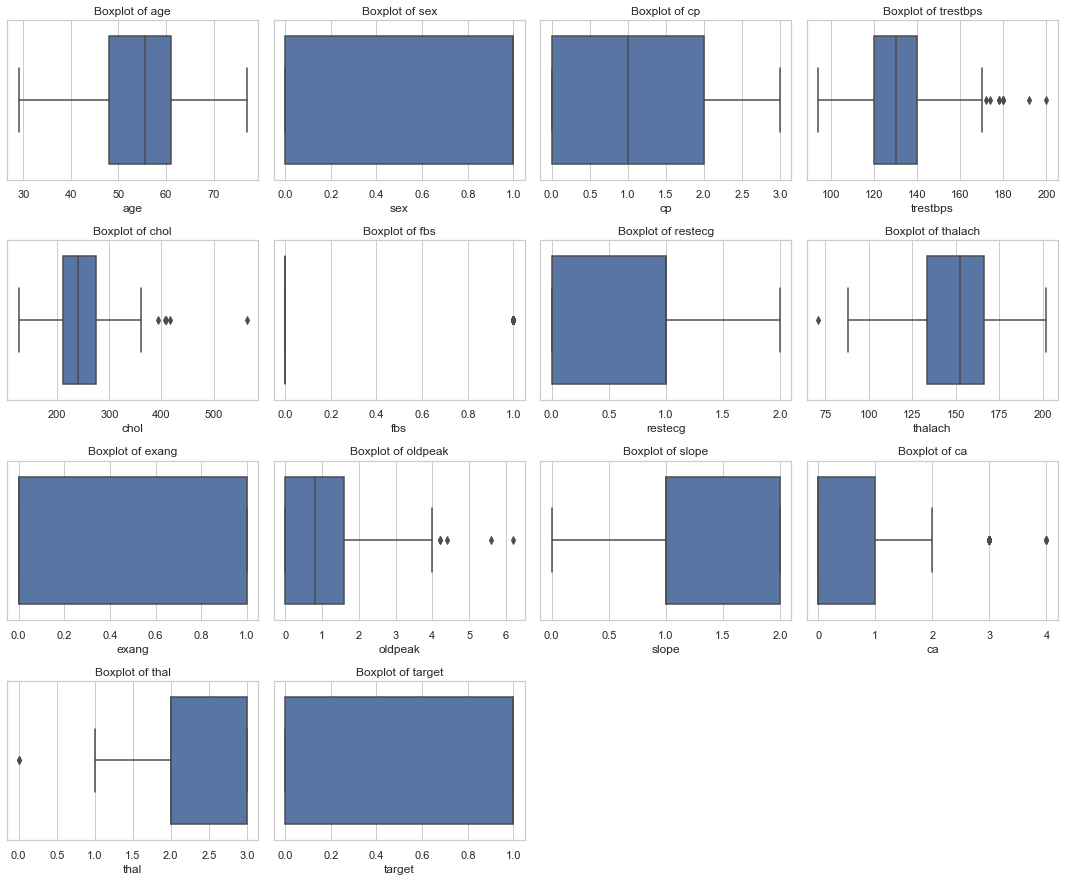

In [26]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Flatten the axes
axes = axes.flatten()

# Plotting boxplots
for i, feature in enumerate(df.columns):
    if i < len(axes): 
        sns.boxplot(x=df[feature], ax=axes[i])
        axes[i].set_title(f'Boxplot of {feature}')

# Removing empty plots if there is any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
# So as we can see, ['trestbps','chol','fbs','thalach','oldpeak','ca','thal'] contains outliers, let's handle them.

In [28]:
# We need to look at the value counts of fbs column for later explanation

df['fbs'].value_counts()

0    257
1     45
Name: fbs, dtype: int64

### Handling outliers

In [29]:
outlier_columns = ['trestbps','chol','fbs','thalach','oldpeak','ca','thal']

In [30]:
# In order to handle outliers in dataset, we will use capping method by setting outliers to upper or lower
# bound values. We avoid trimming as it removes many of the data. 

In [31]:
for col in outlier_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3-Q1

        lower_bound2 = Q1-1.5*IQR
        upper_bound2 = Q3+1.5*IQR
        df.loc[(df[col]>upper_bound2),col] = upper_bound2
        df.loc[(df[col]<lower_bound2),col] = lower_bound2

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_mask = (df < (Q1 - 1.5* IQR)) | (df > (Q3 + 1.5 * IQR))
num_outliers_by_feature = outliers_mask.sum(axis=0)

print(num_outliers_by_feature)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [33]:
# Consequently, we have no more outliers.

In [35]:
# Let's first display the correlation matrix

corr_graph = df.corr()
corr_graph

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.290209,0.198901,NaN,-0.111590,-0.394960,0.093216,0.209143,-0.164124,0.339540,0.065372,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.048559,-0.178446,NaN,-0.060351,-0.045414,0.143460,0.107575,-0.032990,0.104337,0.213268,-0.283609
cp,-0.063107,-0.051740,1.000000,0.055026,-0.089633,NaN,0.041561,0.293351,-0.392937,-0.142327,0.116854,-0.214593,-0.163187,0.432080
trestbps,0.290209,-0.048559,0.055026,1.000000,0.135429,NaN,-0.117933,-0.055130,0.056350,0.182151,-0.115248,0.099233,0.050941,-0.140083
chol,0.198901,-0.178446,-0.089633,0.135429,1.000000,NaN,-0.137117,-0.014519,0.080653,0.053210,0.010459,0.108473,0.084519,-0.099932
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.111590,-0.060351,0.041561,-0.117933,-0.137117,NaN,1.000000,0.043183,-0.068807,-0.059850,0.090402,-0.095604,-0.010948,0.134874
thalach,-0.394960,-0.045414,0.293351,-0.055130,-0.014519,NaN,0.043183,1.000000,-0.381027,-0.349367,0.385844,-0.246889,-0.101701,0.420408
exang,0.093216,0.143460,-0.392937,0.056350,0.080653,NaN,-0.068807,-0.381027,1.000000,0.298094,-0.256106,0.145363,0.211713,-0.435601
oldpeak,0.209143,0.107575,-0.142327,0.182151,0.053210,NaN,-0.059850,-0.349367,0.298094,1.000000,-0.572578,0.260397,0.208488,-0.435099


In [36]:
# We can just take a look at the correlation of target with other features.

corr_graph['target']

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.140083
chol       -0.099932
fbs              NaN
restecg     0.134874
thalach     0.420408
exang      -0.435601
oldpeak    -0.435099
slope       0.343940
ca         -0.447434
thal       -0.350021
target      1.000000
Name: target, dtype: float64

<AxesSubplot:>

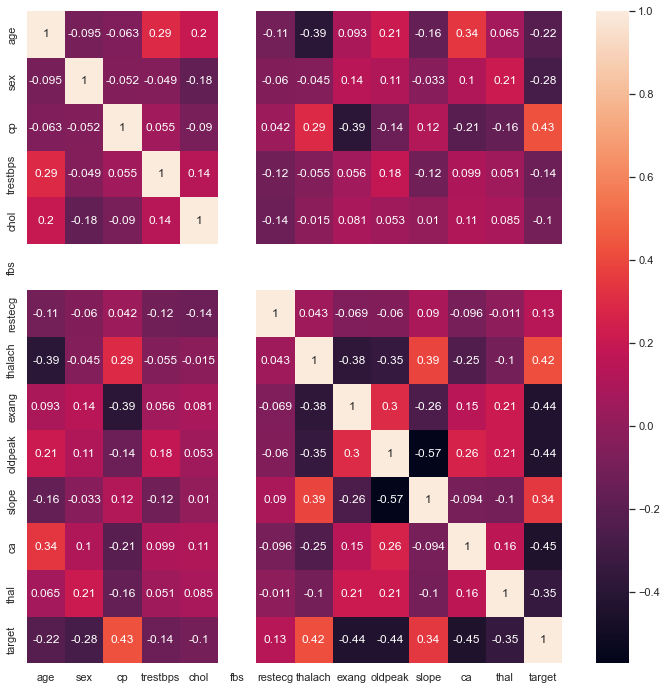

In [37]:
# Let's plot heatmap

plt.figure(figsize = (12,12))
sns.heatmap(corr_graph, annot=True)

In [38]:
# Here we see that fbs column turned into NaN column after outlier handling process. Reason can be huge imbalance of classes
# in this feature, that's why capping may cause some error. However since correlation of fbs with target is not high,
# it won't affect our performance seriously which we will witness later in the process.

## Train | Test Split and Scaling

In [40]:
X = df.drop('target',axis = 1)
Y = df['target']

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.10,random_state=101,stratify = Y)

In [44]:
scaler = StandardScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# By applying StandartScalar, we managed to bring features to normal distribution.

## Logistic Regression Model

In [48]:
lr = LogisticRegression()

In [49]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_scaled, Y_train)   

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [51]:
best_lr = grid_search.best_estimator_
best_lr

LogisticRegression(C=10)

### Coeffecients

In [52]:
coefs = best_lr.coef_
coefs

array([[ 0.09982619, -0.79746377,  0.83922832, -0.4670727 , -0.26507818,
         0.        ,  0.35528773,  0.72694487, -0.50914097, -0.40175173,
         0.25298702, -0.98744522, -0.58999626]])

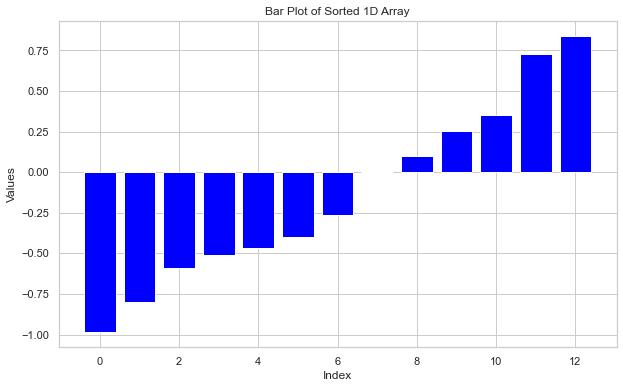

In [54]:
sorted_values = np.sort(coefs.flatten())

# Creating an index for each value
indices = range(len(sorted_values))

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(indices, sorted_values, color='blue')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Bar Plot of Sorted 1D Array')
plt.show()

---------

## Model Performance Evaluation

In [56]:
best_lr.fit(X_train_scaled,Y_train)

LogisticRegression(C=10)

In [57]:
Y_pred = best_lr.predict(X_test_scaled)

#### Confusion Matrix Array

In [58]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[10,  4],
       [ 1, 16]], dtype=int64)

#### Confusion Matrix Plot

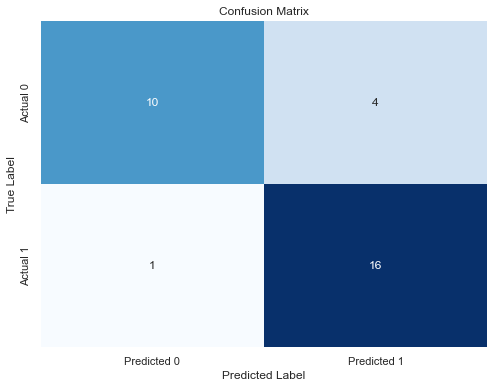

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [61]:
# Confusion matrix shows that model performance is satisfactory. So that we diagnosed 16 people as having heart-disease and 
# 10 people as not having heart-disease correctly. We have just 1 false negative value which is critical point in my opinion
# however we managed to make it minimum.

#### Classification Report


In [63]:
print(classification_report(Y_train,best_lr.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       124
           1       0.84      0.93      0.88       147

    accuracy                           0.87       271
   macro avg       0.87      0.86      0.86       271
weighted avg       0.87      0.87      0.87       271



In [64]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.80      0.94      0.86        17

    accuracy                           0.84        31
   macro avg       0.85      0.83      0.83        31
weighted avg       0.85      0.84      0.84        31



In [65]:
# According to the train and test accuracy, we can confirm that there is no overfitting and underfitting problem.
# As usual, training accuracy is greater than test, but not that much which is good.

### Performance Curves

#### Precision_recall curve

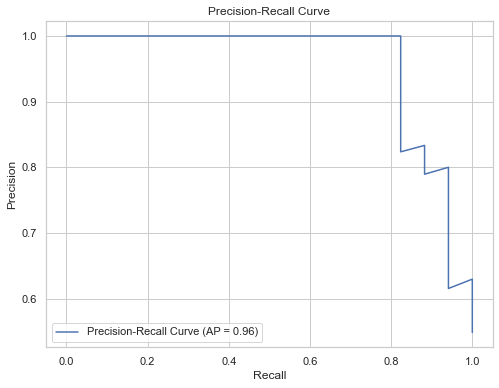

In [67]:
y_scores = best_lr.decision_function(X_test_scaled)

# Calculating precision-recall curve
precision, recall, thresholds1 = precision_recall_curve(Y_test, y_scores)

# Calculating average precision score
average_precision = average_precision_score(Y_test, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

#### ROC curve

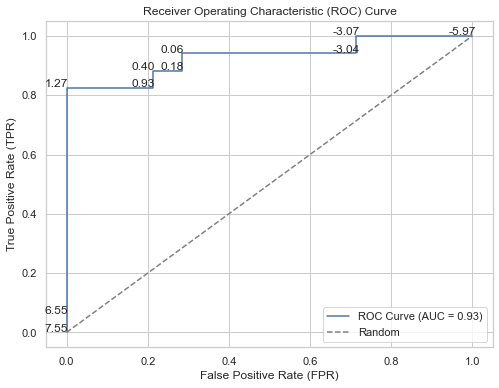

In [69]:
y_scores = best_lr.decision_function(X_test_scaled)

# Calculating ROC curve
fpr,tpr, thresholds = roc_curve(Y_test, y_scores)

# Calculating Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Ploting the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', color='grey', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
for i, threshold in enumerate(thresholds):
    plt.annotate(f'{threshold:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(-10,1), ha='center')

plt.legend(loc='best')
plt.show()

In [70]:
thresholds

array([ 7.55349637,  6.55349637,  1.26684265,  0.93076542,  0.40191176,
        0.18255536,  0.0570046 , -3.03538152, -3.06849619, -5.9694995 ])

In [71]:
threshold_index = np.argmax(tpr - fpr)
selected_threshold = thresholds[threshold_index]
print(f'Selected Threshold: {selected_threshold}')


Selected Threshold: 1.266842650591959


In [72]:
# According to the ROC graph, we can select the best threshold value by finding max(tpr-fpr) which minimizes fpr
# and maximizes tpr, then we will apply new threshold value to our model and observe if there will be
# improvement in the accuracy.

In [73]:
# Here we use our previous model setting with new threshold in order to see whether there is any changes in model performance.

new_predictions = (best_lr.decision_function(X_test_scaled) > 1.26684265).astype(int)  #0.18255536

In [74]:
print('Report of Test data\n')
print(classification_report(Y_test,new_predictions))

Report of Test data

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.82      0.90        17

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31



In [75]:
print('Report of Train data\n')
print(classification_report(Y_train,best_lr.decision_function(X_train_scaled)  > 1.26684265))

Report of Train data

              precision    recall  f1-score   support

           0       0.71      0.93      0.80       124
           1       0.92      0.68      0.78       147

    accuracy                           0.79       271
   macro avg       0.81      0.80      0.79       271
weighted avg       0.82      0.79      0.79       271



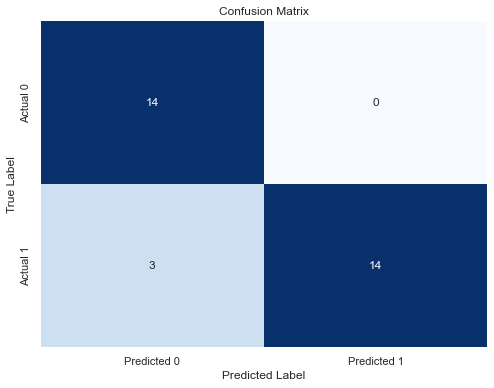

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test,new_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [77]:
# In conclusion, even though we have better results on test data in terms of confusion matrix and accuracy (90%), it performs 
# poorly on training data (79%) and accuracy of test data being greater than training data is unusual.
# That's why we will prefer our original model which we got after tuning.

### New test data 


    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [78]:
data = {
    'age':[48],
    'sex':[0],
    'cp':[2],
    'trestbps':[130],
    'chol':[275],
    'fbs':[0],
    'restecg':[1],
    'thalach':[139],
    'exang':[0],
    'oldpeak':[0.2],
    'slope':[2],
    'ca':[0],
    'thal':[2]
}

In [79]:
new_test = pd.DataFrame(data)
new_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,48,0,2,130,275,0,1,139,0,0.2,2,0,2


In [80]:
# In order to make some operation on new test data, firstly we need to transfrom it using StandartScalar that we built
# before, using train data.

new_test_scaled = scaler.transform(new_test)

In [81]:
new_test_pred = (best_lr.predict(new_test_scaled)).astype(int)
new_test_pred

array([1])

In [82]:
new_test_probabilities = best_lr.predict_proba(new_test_scaled)

positive_class_probabilities = new_test_probabilities[:, 1]
negative_class_probabilities = new_test_probabilities[:, 0]

# Displaying the probabilities
print('Negative class probability:',negative_class_probabilities)
print('Positive class probability:',positive_class_probabilities)

Negative class probability: [0.02066558]
Positive class probability: [0.97933442]


### This result shows that we are 97.9% sure that the patient with these features has heart disease.